# Setting Up


In [ ]:
!nvidia-smi

Tue Jul 22 10:38:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
# from blurr.text.data.all import *
# from blurr.text.modeling.all import *

from blurr.data.all import *
from blurr.modeling.all import *

[autoreload of jupyter_client.manager failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: _laun

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Capstone 3

/content/drive/MyDrive/Capstone 3


# Data

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,name,url,description,categories
0,Brass: Birmingham,https://boardgamegeek.com/boardgame/224517.0,"Brass: Birmingham is an economic strategy game sequel to Martin Wallace's 2007 masterpiece, Brass. Brass: Birmingham tells the story of competing entrepreneurs in Birmingham during the industrial revolution between the years of 1770 and 1870. It offers a very different story arc and experience from its predecessor. As in its predecessor, you must develop, build and establish your industries and network in an effort to exploit low or high market demands. The game is played over two halves: the canal era (years 1770-1830) and the rail era (years 1830-1870). To win the game, score the most V...","['Age of Reason', 'Economic', 'Industry', 'Manufacturing', 'Post-Napoleonic', 'Trains', 'Transportation']"
1,Pandemic Legacy: Season 1,https://boardgamegeek.com/boardgame/161936.0,"Pandemic Legacy is a co-operative campaign game, with an overarching story arc played through 12-24 sessions, depending on how well your group does at the game. At the beginning, the game starts in a very similar fashion as basic Pandemic, in which your team of disease-fighting specialists races against the clock to travel around the world, treating disease hot spots while researching cures for each of four plagues before they get out of hand. During a player's turn, they have four actions available, with which they may travel around in the world in various ways (sometimes needing to disc...","['Environmental', 'Medical']"
2,Ark Nova,https://boardgamegeek.com/boardgame/342942.0,"In Ark Nova, you will plan and design a modern, scientifically managed zoo. With the ultimate goal of owning the most successful zoological establishment, you will build enclosures, accommodate animals, and support conservation projects all over the world. Specialists and unique buildings will help you in achieving this goal. Each player has a set of five action cards to manage their gameplay, and the power of an action is determined by the slot the card currently occupies. The cards in question are: CARDS: Allows you to gain new zoo cards (animals, sponsors, and conservation projec...","['Animals', 'Economic', 'Environmental']"
3,Gloomhaven,https://boardgamegeek.com/boardgame/174430.0,"Gloomhaven is a game of Euro-inspired tactical combat in a persistent world of shifting motives. Players will take on the roles of wandering adventurers with their own special sets of skills and their own reasons for traveling to this dark corner of the world. Players must work together out of necessity to clear out menacing dungeons and forgotten ruins. In the process, they will enhance their abilities with experience and loot, discover new locations to explore and plunder, and expand an ever-branching story fueled by the decisions they make. This is a game with a persistent and changin...","['Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures']"
4,Twilight Imperium: Fourth Edition,https://boardgamegeek.com/boardgame/233078.0,"Twilight Imperium (Fourth Edition) is a game of galactic conquest in which three to six players each take on the role of one of seventeen factions vying for galactic domination through military might, political maneuvering, and economic bargaining. Every faction offers a completely different play experience, from the wormhole-hopping Ghosts of Creuss to the Emirates of Hacan, masters of trade and economics. These seventeen races are offered many paths to victory, but only one may sit upon the throne of Mecatol Rex as the new masters of the galaxy. No two games of Twilight Imperium are eve...","['Civilization', 'Economic', 'Exploration', 'Negotiation', 'Political', 'Science Fiction', 'Space Exploration', 'Wargame']"


In [ ]:
df = df.dropna().reset_index(drop=True)

df = df.drop_duplicates(keep='first')

categories_list = df.categories.to_list()
category_count = {}

for categories in categories_list:
    category_list = eval(categories)
    for category in category_list:
      if category in category_count.keys():
         category_count[category] += 1
      else:
         category_count[category] = 1

print(f"Number of Categories: {len(category_count)}")
print(category_count)

Number of Categories: 93
{'Age of Reason': 219, 'Economic': 2008, 'Industry': 393, 'Manufacturing': 393, 'Post-Napoleonic': 341, 'Trains': 437, 'Transportation': 525, 'Environmental': 373, 'Medical': 118, 'Animals': 2016, 'Adventure': 1685, 'Exploration': 1288, 'Fantasy': 3717, 'Fighting': 2188, 'Miniatures': 1482, 'Civilization': 442, 'Negotiation': 838, 'Political': 698, 'Science Fiction': 2262, 'Space Exploration': 409, 'Wargame': 4850, 'Movies': 1497, 'TV': 1497, 'Radio theme': 1497, 'Novel-based': 660, 'Territory Building': 704, 'Civil War': 226, 'Mythology': 534, 'Modern Warfare': 501, 'Card Game': 9072, 'Dice': 2604, 'Medieval': 1277, 'American West': 300, 'Ancient': 939, 'City Building': 687, 'Horror': 913, 'Farming': 329, 'Puzzle': 1153, 'Nautical': 860, 'Collectible Components': 468, 'Educational': 754, 'Religious': 172, 'Travel': 359, 'Aviation': 372, 'Flight': 372, 'Deduction': 1742, 'Racing': 841, 'Sports': 739, 'Comic Book': 455, 'Strip': 455, 'Action': 1401, 'Dexterity':

In [ ]:
threshold = int(len(df) * 0.0017)
rare_categories = [key for key, value in category_count.items() if value < threshold]
len(rare_categories), rare_categories[:5]

(3, ['Game System', 'Fan Expansion', 'Korean War'])

In [ ]:
categories_list = df.categories.to_list()
revised_category_list = []
indices_to_drop = []

for idx, categories in enumerate(categories_list):
  category_list = eval(categories)
  revised_categories = []

  for category in category_list:
    if category not in rare_categories:
      revised_categories.append(category)

  if len(revised_categories) == 0:
    indices_to_drop.append(idx)
  else:
    revised_category_list.append(revised_categories)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(29565, 4)

In [ ]:
df['revised_categories'] = revised_category_list

In [ ]:
df.tail()

,name,url,description,categories,revised_categories
29560,Mothra vs. Godzilla,https://boardgamegeek.com/boardgame/5982.0,"Part of Bandai Co., Ltd.'s Game for Adult ~ IF series (meaning aimed at older players, not anything with objectionable content0. Complexity 2 on Bandai Co., Ltd.'s 1-7 scale (1=easiest) """"If"""" refers to the their gimmick of setting up each game in the series as a """"What if... (insert game scenario)"""" This particular game has Godzilla fighting other Toho movie monsters as a hex-based wargame. It has the same game designer as the """"Godzilla Computer Wargame 03"""". Includes counters and 9 figures to represent the people and monsters. Map is made up of 2 mounted boards (double sided, making...","['Science Fiction', 'Wargame']","[Science Fiction, Wargame]"
29561,Xanadu,https://boardgamegeek.com/boardgame/5983.0,"Based off the classic Falcom computer/videogame RPG. Very similar in basic play to TSR's Dungeon!. You traverse the area, going into rooms to battle monsters and get treasures, including items needed to get into the final rooms in a castle to slay a particularly nasty dragon.",['Fantasy'],[Fantasy]
29562,Epoch Wargame Electronics #1: The Battle In the Japan Sea,https://boardgamegeek.com/boardgame/5984.0,"1st of 12 games in the Epoch Electronic Wargame Electronics series. Each of the games features: Easy to learn rules (in Japanese) Quick games that average about 30 minutes (not including setup) Magnetic pieces on a set board An electronic dice-roller with 6 LED dots to work out the effects of combat. As long as one player knows the rules, the other player does not need to know any Japanese in order to play the game. This particular entry in the series centers around a naval battle between Japan and Russia in the Japan Sea during World War 1.","['Electronic', 'Wargame', 'World War I']","[Electronic, Wargame, World War I]"
29563,Ra: Strategy Among Hexagons,https://boardgamegeek.com/boardgame/5986.0,"This is a strategic game over hexagons, with easy rules, but is challenging to play with coordination. Victory will belong to whoever has the capacity to win but also to lose with intelligence. Contents: Playing board in rigid thick cardboard and printed in metallic colours. 18 cylindrical pieces in rigid, coloured plastic. Rule booklet in 4 languages with examples. Not to be confused with Reiner Knizia's Ra (1999).",['Abstract Strategy'],[Abstract Strategy]
29564,Banditos,https://boardgamegeek.com/boardgame/5987.0,"Players earn their money by making Bandito raids. At the start, all the Banditos are four miles away from the banks. Mile cards are played in turn order so as to reduce that distance. The player who places the appropriate """"4"""" mile card is finally able to rob a bank and get the dollars it holds. But you won't always have the necessary matching cards needed to reach that goal. Then, small gifts of money to the other players will help the right cards to come your way. At the end of the game, the player who makes off with the most dollars wins.",['Card Game'],[Card Game]


In [ ]:
revised_categories_list = df.revised_categories.to_list()
revised_category_count = {}
for categories in revised_categories_list:
  category_list = categories
  for category in category_list:
    if category in revised_category_count.keys():
      revised_category_count[category] += 1
    else:
      revised_category_count[category] = 1
print(f"Number of Categories: {len(revised_category_count)}")

Number of Categories: 90
{'Age of Reason': 219, 'Economic': 2008, 'Industry': 393, 'Manufacturing': 393, 'Post-Napoleonic': 341, 'Trains': 437, 'Transportation': 525, 'Environmental': 373, 'Medical': 118, 'Animals': 2016, 'Adventure': 1685, 'Exploration': 1288, 'Fantasy': 3717, 'Fighting': 2188, 'Miniatures': 1482, 'Civilization': 442, 'Negotiation': 838, 'Political': 698, 'Science Fiction': 2262, 'Space Exploration': 409, 'Wargame': 4850, 'Movies': 1497, 'TV': 1497, 'Radio theme': 1497, 'Novel-based': 660, 'Territory Building': 704, 'Civil War': 226, 'Mythology': 534, 'Modern Warfare': 501, 'Card Game': 9072, 'Dice': 2604, 'Medieval': 1277, 'American West': 300, 'Ancient': 939, 'City Building': 687, 'Horror': 913, 'Farming': 329, 'Puzzle': 1153, 'Nautical': 860, 'Collectible Components': 468, 'Educational': 754, 'Religious': 172, 'Travel': 359, 'Aviation': 372, 'Flight': 372, 'Deduction': 1742, 'Racing': 841, 'Sports': 739, 'Comic Book': 455, 'Strip': 455, 'Action': 1401, 'Dexterity':

In [ ]:
encode_category_types = { key: idx for idx, (key, value) in enumerate(revised_category_count.items())}
with open("category_types_encoded.json", "w") as fp:
  json.dump(encode_category_types, fp)

In [ ]:
# We need this because for multilabel classification all categoriess have possibility to be present in the predictions
categorical_category_list = []
revised_categories_list = df.revised_categories.to_list()

for revised_categories in revised_categories_list:
  categorical_list = [0] * len(encode_category_types)
  for category in revised_categories:
    category_type_index = encode_category_types[category]
    categorical_list[category_type_index] = 1
  categorical_category_list.append(categorical_list)

categorical_category_list[3][:23]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['category_cat_list'] = categorical_category_list
df.head()

,name,url,description,categories,revised_categories,category_cat_list
0,Brass: Birmingham,https://boardgamegeek.com/boardgame/224517.0,"Brass: Birmingham is an economic strategy game sequel to Martin Wallace's 2007 masterpiece, Brass. Brass: Birmingham tells the story of competing entrepreneurs in Birmingham during the industrial revolution between the years of 1770 and 1870. It offers a very different story arc and experience from its predecessor. As in its predecessor, you must develop, build and establish your industries and network in an effort to exploit low or high market demands. The game is played over two halves: the canal era (years 1770-1830) and the rail era (years 1830-1870). To win the game, score the most V...","['Age of Reason', 'Economic', 'Industry', 'Manufacturing', 'Post-Napoleonic', 'Trains', 'Transportation']","[Age of Reason, Economic, Industry, Manufacturing, Post-Napoleonic, Trains, Transportation]","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Pandemic Legacy: Season 1,https://boardgamegeek.com/boardgame/161936.0,"Pandemic Legacy is a co-operative campaign game, with an overarching story arc played through 12-24 sessions, depending on how well your group does at the game. At the beginning, the game starts in a very similar fashion as basic Pandemic, in which your team of disease-fighting specialists races against the clock to travel around the world, treating disease hot spots while researching cures for each of four plagues before they get out of hand. During a player's turn, they have four actions available, with which they may travel around in the world in various ways (sometimes needing to disc...","['Environmental', 'Medical']","[Environmental, Medical]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Ark Nova,https://boardgamegeek.com/boardgame/342942.0,"In Ark Nova, you will plan and design a modern, scientifically managed zoo. With the ultimate goal of owning the most successful zoological establishment, you will build enclosures, accommodate animals, and support conservation projects all over the world. Specialists and unique buildings will help you in achieving this goal. Each player has a set of five action cards to manage their gameplay, and the power of an action is determined by the slot the card currently occupies. The cards in question are: CARDS: Allows you to gain new zoo cards (animals, sponsors, and conservation projec...","['Animals', 'Economic', 'Environmental']","[Animals, Economic, Environmental]","[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Gloomhaven,https://boardgamegeek.com/boardgame/174430.0,"Gloomhaven is a game of Euro-inspired tactical combat in a persistent world of shifting motives. Players will take on the roles of wandering adventurers with their own special sets of skills and their own reasons for traveling to this dark corner of the world. Players must work together out of necessity to clear out menacing dungeons and forgotten ruins. In the process, they will enhance their abilities with experience and loot, discover new locations to explore and plunder, and expand an ever-branching story fueled by the decisions they make. This is a game with a persistent and changin...","['Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures']","[Adventure, Exploration, Fantasy, Fighting, Miniature

# Dataloaders and Modeling

In [ ]:
labels = list(encode_category_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

# hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
# blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
blocks = (HF_TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('category_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-game-classifier.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-game-classifier.pkl")

In [ ]:
dls.vocab

['Age of Reason', 'Economic', 'Industry', 'Manufacturing', 'Post-Napoleonic', 'Trains', 'Transportation', 'Environmental', 'Medical', 'Animals', 'Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures', 'Civilization', 'Negotiation', 'Political', 'Science Fiction', 'Space Exploration', 'Wargame', 'Movies', 'TV', 'Radio theme', 'Novel-based', 'Territory Building', 'Civil War', 'Mythology', 'Modern Warfare', 'Card Game', 'Dice', 'Medieval', 'American West', 'Ancient', 'City Building', 'Horror', 'Farming', 'Puzzle', 'Nautical', 'Collectible Components', 'Educational', 'Religious', 'Travel', 'Aviation', 'Flight', 'Deduction', 'Racing', 'Sports', 'Comic Book', 'Strip', 'Action', 'Dexterity', 'Spies', 'Secret Agents', 'Murder', 'Mystery', 'Video Game Theme', 'Pirates', 'Bluffing', 'Mature', 'Adult', 'Abstract Strategy', 'Renaissance', 'Arabian', 'Prehistoric', 'Party Game', 'Word Game', 'World War II', 'Number', 'Pike and Shot', 'Real-time', 'Electronic', 'Zombies', 'World War I', 'Hu

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"In Bra$ilis, most of the citizen that come to politics try to take advantage of their position with schemes, make some extra money and raise in status and power. What move Bra$ilis is the power, in this game you will be able to feel that power. Each player takes roll of a politic that has as a main objective obtain the majority of votes. And for that, every move counts!! Make partnerships, create intrigues, lie and make a fool of other politics... in resume, everything you find in politics! Run away from s","[Negotiation, Political, Card Game, Bluffing]"
1,"Sixty years of tense, uneasy peace are shattered as the Korean Peninsula erupts in renewed warfare. One historically, ethnically, and culturally homogeneous people polarized and separated by superpower politics and economics hurl men, weapons, and material into the maelstrom of modern combat in an attempt to settle their arbitrary division once and for all. From Pyongyang in North Korea to Busan in the South, the war rages. In a scene reminiscent of the first attack by the In Min Gun in 1950, the North Ko","[Wargame, Modern Warfare]"
2,"Pacific War is a Strategic wargame that takes you from the attack on Pearl Harbor to the climatic summer of 1945… from Australia to China… from Burma to Hawaii… from the defense of Wake Island through the invasion of Guadalcanal culminating in the desperate battles to defend the Japanese Home Islands. Players can become familiar with the layered Pacific War systems in the solitaire Engagement scenarios, then fight their way through increasingly panoramic Battle, Campaign, and Strategic two player and mult","[Wargame, Nautical, World War II]"
3,"Over seventy years later, and the divisions still run deeper than the straits which separate the Republic of China (the ROC) from the People's Republic of China (the PRC). Times have changed greatly since the PRC failed to conquer the island of Taiwan from the nationalists' Republic of China at the end of the Chinese Civil War in 1949 and the states that were even then separated by politics and economics have grown further apart as both sides now hurl men, weapons, and material into the maelstrom of modern","[Wargame, Modern Warfare]"


In [ ]:
# model = BaseModelWrapper(hf_model)
model = HF_BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(Adam, decouple_wd=True),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[HF_BaseModelCallback],
                  splitter=hf_splitter
                  ).to_fp16()

# Satge - 0

In [ ]:
learner.freeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0010000000474974513, valley=0.00019054606673307717)

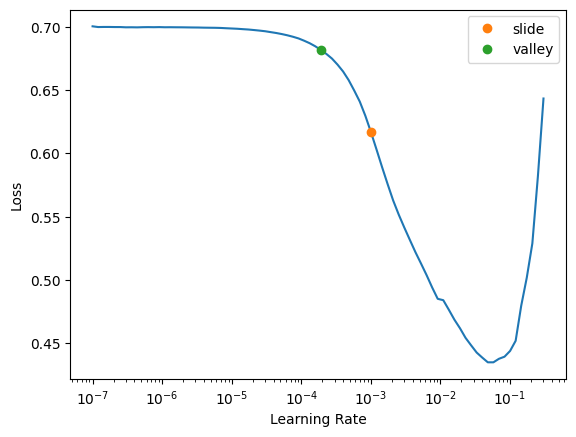

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(10, 1.9e-5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.473783,0.432953,0.031563,02:03
1,0.127402,0.123680,0.964043,02:01
2,0.125382,0.122208,0.964374,01:59
3,0.117729,0.114116,0.966719,02:00
4,0.108420,0.105696,0.967272,02:00
5,0.102423,0.099772,0.966998,02:00
6,0.099363,0.096253,0.967054,02:00
7,0.098639,0.094474,0.967272,02:00
8,0.096896,0.093818,0.967219,02:02
9,0.095623,0.093730,0.967253,02:02


In [ ]:
learner.save("game-classifier-stage-0")

Path('models/game-classifier-stage-0.pth')

In [ ]:
learner.export("models/game-classifier-stage-0.pkl")

# Stage - 1

In [ ]:
# learner.load("game-classifier-stage-0")

In [ ]:
learner.unfreeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0006918309954926372, valley=5.248074739938602e-05)

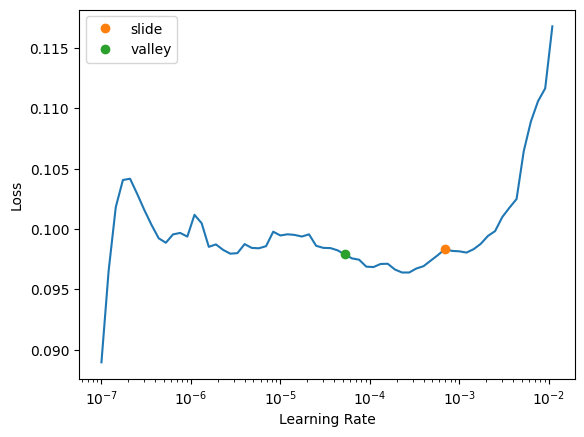

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(10, 1.15e-5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.090852,0.087615,0.968031,02:55
1,0.083312,0.079748,0.971422,02:55
2,0.077798,0.074165,0.969320,02:53
3,0.072894,0.070186,0.974004,02:53
4,0.067902,0.067518,0.973891,02:52
5,0.066292,0.065928,0.973944,02:53
6,0.063935,0.064996,0.974989,02:53
7,0.063584,0.064340,0.974041,02:53
8,0.063613,0.064123,0.974632,02:54
9,0.061859,0.064077,0.974951,02:56


In [ ]:
learner.save("game-classifier-stage-1")

Path('models/game-classifier-stage-1.pth')

In [ ]:
learner.export("models/game-classifier-stage-1.pkl")